In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import torch
from torch.autograd import Variable
import torch.nn.functional as F
import torch.utils.data as Data

import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd
import numpy as np
import imageio
from sklearn.model_selection import train_test_split



In [6]:
x = pd.read_csv('/content/drive/MyDrive/repos/DEWA_task/input.csv', header=None)
y = pd.read_csv('/content/drive/MyDrive/repos/DEWA_task/output.csv', header=None)

x = torch.tensor(x.values.astype(np.float32))
y = torch.tensor(y.values.astype(np.float32))

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

x_train.shape

torch.Size([17536, 23])

In [7]:
# torch can only train on Variable, so convert them to Variable
x_train, y_train = Variable(x_train), Variable(y_train)
print(y.size)

<built-in method size of Tensor object at 0x7f2dd4a24558>


In [10]:
# this is one way to define a network
class Net(torch.nn.Module):
    def __init__(self, n_feature, n_hidden, n_output):
        super(Net, self).__init__()
        self.hidden1 = torch.nn.Linear(n_feature, 20)   # hidden layer
        
        self.hidden2 = torch.nn.Linear(20, 16)   # hidden layer2
        self.hidden3 = torch.nn.Linear(16, 12)   # hidden layer2
        self.hidden4 = torch.nn.Linear(12, 8)   # hidden layer2
        
        self.predict = torch.nn.Linear(8, n_output)   # output layer

    def forward(self, x):
        x = F.relu(self.hidden1(x))      # activation function for hidden layer
        x = F.relu(self.hidden2(x))      # activation function for hidden layer
        x = F.relu(self.hidden3(x))      # activation function for hidden layer
        x = F.relu(self.hidden4(x))      # activation function for hidden layer
        x = self.predict(x)             # linear output
        return x

net = Net(n_feature=23, n_hidden=10, n_output=4)     # define the network
# print(net)  # net architecture
optimizer = torch.optim.SGD(net.parameters(), lr=0.2)
loss_func = torch.nn.MSELoss()  # this is for regression mean squared loss

# my_images = []
# fig, ax = plt.subplots(figsize=(12,7))

train_losses = []

# train the network
for t in range(200):
  
    prediction_train = net(x_train)     # input x and predict based on x
    train_loss = loss_func(prediction_train, y_train)     # must be (1. nn output, 2. target)

    print(f'Epoch: {t},\t Loss: {train_loss}')
    train_losses.append(train_loss.item())

    optimizer.zero_grad()   # clear gradients for next train
    train_loss.backward()         # backpropagation, compute gradients
    optimizer.step()        # apply gradients
    


Epoch: 0,	 Loss: 773.3119506835938
Epoch: 1,	 Loss: 9740453251383296.0
Epoch: 2,	 Loss: 89750648127488.0
Epoch: 3,	 Loss: 72698025738240.0
Epoch: 4,	 Loss: 58885402525696.0
Epoch: 5,	 Loss: 47697180491776.0
Epoch: 6,	 Loss: 38634711416832.0
Epoch: 7,	 Loss: 31294115282944.0
Epoch: 8,	 Loss: 25348234280960.0
Epoch: 9,	 Loss: 20532068089856.0
Epoch: 10,	 Loss: 16630975299584.0
Epoch: 11,	 Loss: 13471091523584.0
Epoch: 12,	 Loss: 10911582519296.0
Epoch: 13,	 Loss: 8838383140864.0
Epoch: 14,	 Loss: 7159089201152.0
Epoch: 15,	 Loss: 5798862782464.0
Epoch: 16,	 Loss: 4697077841920.0
Epoch: 17,	 Loss: 3804633235456.0
Epoch: 18,	 Loss: 3081752805376.0
Epoch: 19,	 Loss: 2496219840512.0
Epoch: 20,	 Loss: 2021938036736.0
Epoch: 21,	 Loss: 1637769936896.0
Epoch: 22,	 Loss: 1326593605632.0
Epoch: 23,	 Loss: 1074540773376.0
Epoch: 24,	 Loss: 870378110976.0
Epoch: 25,	 Loss: 705006272512.0
Epoch: 26,	 Loss: 571055079424.0
Epoch: 27,	 Loss: 462554628096.0
Epoch: 28,	 Loss: 374669213696.0
Epoch: 29,	 L

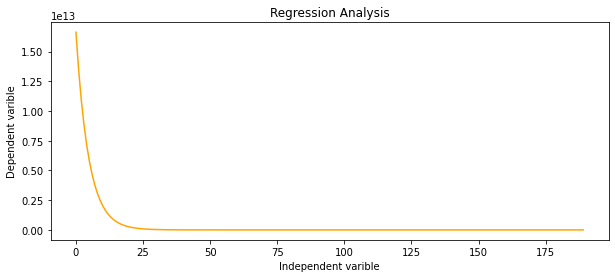

In [11]:
plt.figure(figsize=(10,4))
plt.plot(train_losses[10:], color = "orange")
plt.title('Regression Analysis')
plt.xlabel('Independent varible')
plt.ylabel('Dependent varible')
# plt.grid()
plt.show()